In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


# Linear Regression

In [2]:
df=pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df['Total_Spend']=df['TV']+df['radio']+df['newspaper']

In [5]:
df.head()

,TV,radio,newspaper,sales,Total_Spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot:xlabel='Total_Spend', ylabel='sales'>

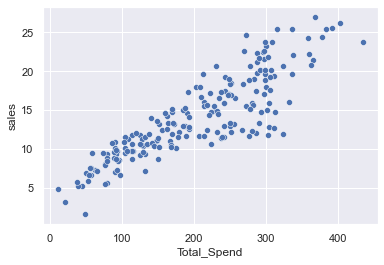

In [6]:
sns.scatterplot(x=df['Total_Spend'],y=df['sales'])

<AxesSubplot:xlabel='Total_Spend', ylabel='sales'>

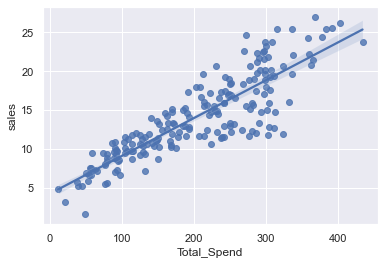

In [7]:
sns.regplot(x=df['Total_Spend'],y=df['sales'])

In [8]:
X=df['Total_Spend']
y=df['sales']

In [9]:
m,b=np.polyfit(X,y,deg=1)

In [10]:
#y=mx+b

spend=input("Enter spend to predict sale: ")
sale=m*float(spend)+b
print("Predicted sale is: ",sale)


Enter spend to predict sale: 721
Predicted sale is:  39.346989205070045


In [11]:
spends=np.linspace(0,500,100)

In [12]:
spends

array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

In [13]:
m

0.048687879319048145

In [14]:
b

4.2430282160363255

In [15]:
sales=(m*spends)+b

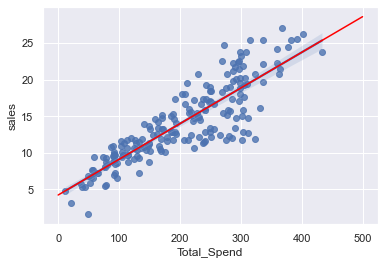

In [16]:
sns.regplot(x=df['Total_Spend'],y=df['sales'])
plt.plot(spends,sales,color='red')

In [17]:
#Sales_Predictor:

spend=input("Enter spend: ")
sale=m*float(spend)+b
print("Predicted sale is: ",sale)

Enter spend: 123
Predicted sale is:  10.231637372279248


In [18]:
np.polyfit(X,y,3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [19]:
#y=B3*x**3+B2*x**2+B1x+B0
pot_spend=np.linspace(0,500,100)
pred_sale=3.07615033e-07*pot_spend**3+-1.89392449e-04*pot_spend**2+8.20886302e-02*pot_spend+2.70495053e+00

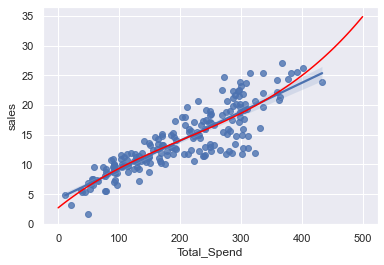

In [20]:
sns.regplot(x=df['Total_Spend'],y=df['sales'])
plt.plot(pot_spend,pred_sale,color='red')

## Scikit-Learn

In [21]:
df=pd.read_csv('Advertising.csv')

In [22]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [23]:
X=df.drop('sales',axis=1)

In [24]:
y=df['sales']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
model=LinearRegression()

In [29]:
model.fit(X_train,y_train)

LinearRegression()

In [30]:
y_pred=model.predict(X_test)

In [31]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [32]:
df['sales'].mean()

14.022500000000003

In [33]:
mean_absolute_error(y_test,y_pred)

1.2137457736144808

In [34]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.5161519375993877

In [35]:
residuals=y_test-y_pred

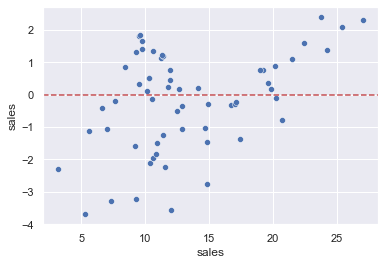

In [36]:
sns.scatterplot(x=y_test,y=residuals)
plt.axhline(y=0,color='r',ls='--')

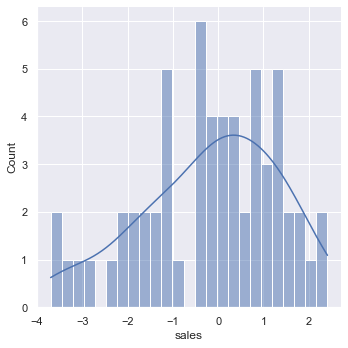

In [37]:
sns.displot(x=residuals,bins=25,kde=True)

## Deployment

In [38]:
final_model=LinearRegression()

In [39]:
final_model.fit(X,y)

LinearRegression()

In [40]:
from joblib import load,dump

In [41]:
dump(final_model,"Final_Sales_Model1.joblib")

['Final_Sales_Model1.joblib']

In [42]:
loaded_model=load('Final_Sales_Model1.joblib')

In [43]:
X.shape

(200, 3)

In [44]:
#What could be sales if 149 spent of TV, 22 spent of radio
#and 12 spent of newspaper?

loaded_model.predict([[149,22,12]])

array([13.893032])

In [45]:
df['sales'].mean()

14.022500000000003

In [46]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.5161519375993877

In [47]:
(1-(1.51/14.02))*100

89.22967189728959

In [48]:
#accuracy would be around 89%